In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import os

In [2]:
# 従来方法の評価対象logの読み込み
eval_list = ["eval5", "eval7", "eval12"]
model_list = ["v" + str(i) for i in range(1, 21)]
conventional_accs = []

for eval_v in eval_list:
    accs = []
    for model_v in model_list:
        path = os.path.join("../conventional/eval/result", eval_v, model_v, "log.json")
        with open(path) as f:
            log = json.load(f)
        acc = log[-1]["test_acc"]
        accs.append(acc)
    conventional_accs.append(accs)

In [3]:
# 提案方法の評価対象logの読み込み
eval_list = ["eval29", "eval31", "eval35"]
model_list = ["v" + str(i) for i in range(1, 21)]
proposal_accs = []

for eval_v in eval_list:
    accs = []
    for model_v in model_list:
        path = os.path.join("../proposal/eval/result", eval_v, model_v, "log.json")
        with open(path) as f:
            log = json.load(f)
        acc = log[-1]["test_acc"]
        accs.append(acc)
    proposal_accs.append(accs)

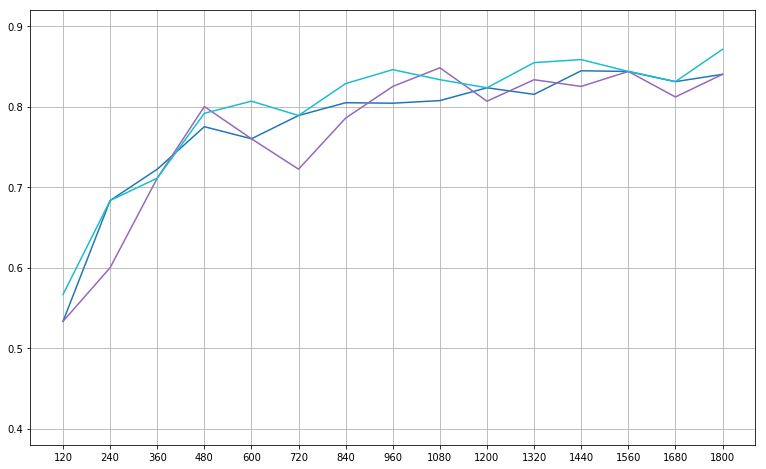

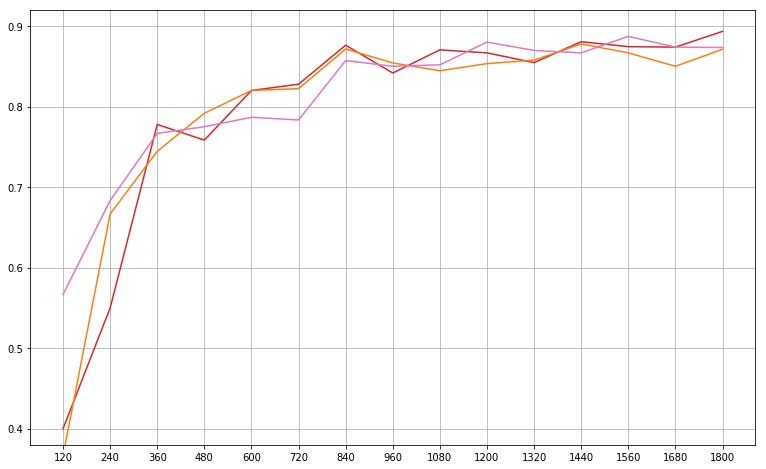

In [25]:
# 従来方法の精度推移3例
xlist = list(range(1, 16))

fig1 = plt.figure(figsize=(13,8))
plt.ylim(0.38, 0.92)
plt.xticks(xlist, list(range(120, 120*15+1, 120)))
plt.plot(xlist, conventional_accs[0][:15], color="tab:blue")
plt.plot(xlist, conventional_accs[1][:15], color="tab:purple")
plt.plot(xlist, conventional_accs[2][:15], color="tab:cyan")
plt.grid(True)

# 提案方法の精度推移3例
fig2 = plt.figure(figsize=(13,8))
plt.ylim(0.38, 0.92)
plt.xticks(xlist, list(range(120, 120*15+1, 120)))
plt.plot(xlist, proposal_accs[0][:15], color="tab:red")
plt.plot(xlist, proposal_accs[1][:15], color="tab:orange")
plt.plot(xlist, proposal_accs[2][:15], color="tab:pink")
plt.grid(True)

In [4]:
conv_avgs = np.zeros(20)
for i in range(3):
    conv_avgs += np.array(conventional_accs[i])
conv_avgs = conv_avgs / 3

In [5]:
prop_avgs = np.zeros(20)
for i in range(3):
    prop_avgs += np.array(proposal_accs[i])
prop_avgs = prop_avgs / 3

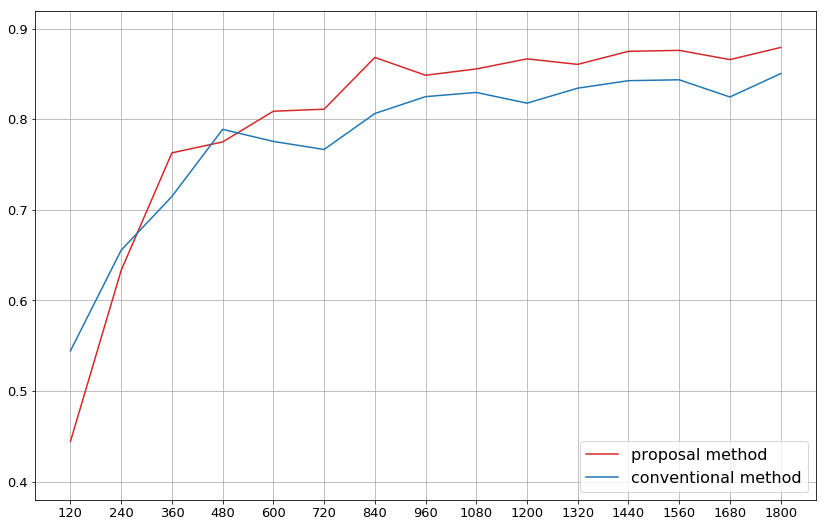

In [6]:
# 提案方法と従来方法の精度の平均値の比較
xlist = list(range(1, 16))

fig1 = plt.figure(figsize=(14,9))
plt.ylim(0.38, 0.92)
plt.xticks(xlist, list(range(120, 120*15+1, 120)), fontsize=13)
plt.yticks(fontsize=13)
plt.plot(xlist, prop_avgs[:15], color="tab:red", label="proposal method") # queryN=10, 1/2update
plt.plot(xlist, conv_avgs[:15], color="tab:blue", label="conventional method")
plt.legend(loc="lower right", fontsize=16)
plt.grid(True)

In [24]:
diff = prop_avgs[:15] - conv_avgs[:15]
print("平均: ",np.mean(diff[4:]))
print("最大: ",np.max(diff[4:]))

平均:  0.036310532901441976
最大:  0.061904761904761796
